## Twitter US Airline Sentiment by Abimbola Salami

### Background
Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

### Data Description
A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

### Objective
This analysis predicts if the sentiment expressed by a Twitter post on the Airline is either negative, positive or neutral

#### Data Summary

In [1]:
# Import the necessary libraries

import re, string, unicodedata
import contractions
from bs4 import BeautifulSoup
import wordcloud
import numpy as np
import pandas as pd
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer  

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oluwa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oluwa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\oluwa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Loading data
tweet_data = pd.read_csv("Tweets.csv")

##### Data Columns

In [3]:
# Print the dimensions of the dataset
tweet_data.shape   

(14640, 15)

- The data contains 14,640 rows and 15 columns

In [4]:
# Print the first 5 rows of the dataframe
tweet_data.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### Exploratory Data Analysis

In [5]:
# Getting the description of the dataset
tweet_data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [6]:
# Getting the information on the dataset
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


- The dataset consists of int64, object and float64 datatypes
- The dataset contains null values

In [7]:
# checking for null values within the dataset

tweet_data.isnull().sum(axis=0)

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [8]:
#checking the unique values in the 'airline_sentiment' column
tweet_data['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [9]:
#counting the number of unique values in 'airline_sentiment'

tweet_data['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [10]:
tweet_data.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

#### Distribution of tweets among each airline

In [11]:
# List of airline companies ranked in decreasing order by number of tweets
airlines = list(tweet_data['airline'].value_counts().sort_values(ascending=False).keys())
print(airlines)

['United', 'US Airways', 'American', 'Southwest', 'Delta', 'Virgin America']


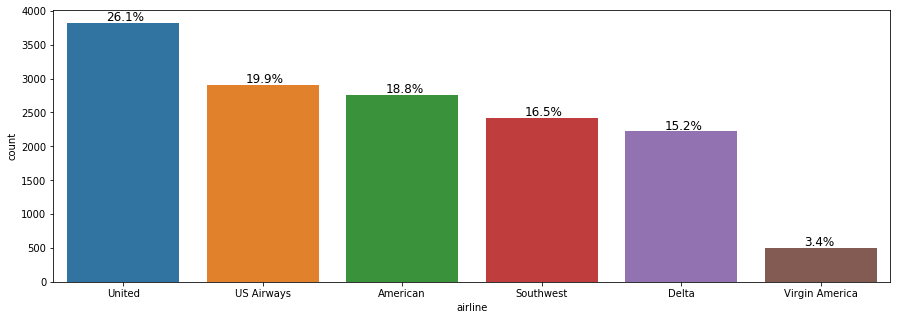

In [12]:
# Distribution of tweets among each airline
plt.figure(figsize=(15,5))
ax = sns.countplot(x='airline', data=tweet_data, order = airlines)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/len(tweet_data)) # percentage of each class of the category
        x = p.get_x() + 0.35 * p.get_width() # width of the plot
        y = p.get_height() + 30         # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage
plt.show()

#### Distribution of sentiments across all the tweets

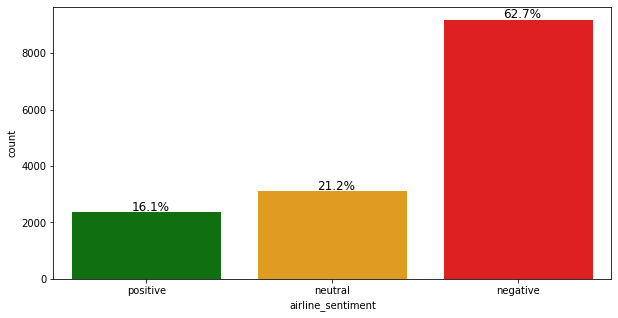

In [13]:
# Distribution of sentiments across all the tweets
plt.figure(figsize=(10,5))
ax = sns.countplot(x='airline_sentiment', 
                   data=tweet_data, 
                   palette={'positive': 'green', 'negative': 'red', 'neutral': 'orange'},
                   order=['positive', 'neutral','negative'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/len(tweet_data)) # percentage of each class of the category
        x = p.get_x() + 0.4 * p.get_width() # width of the plot
        y = p.get_height() + 60         # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage
plt.show();

#### Distribution of Sentiment of tweets for each airline

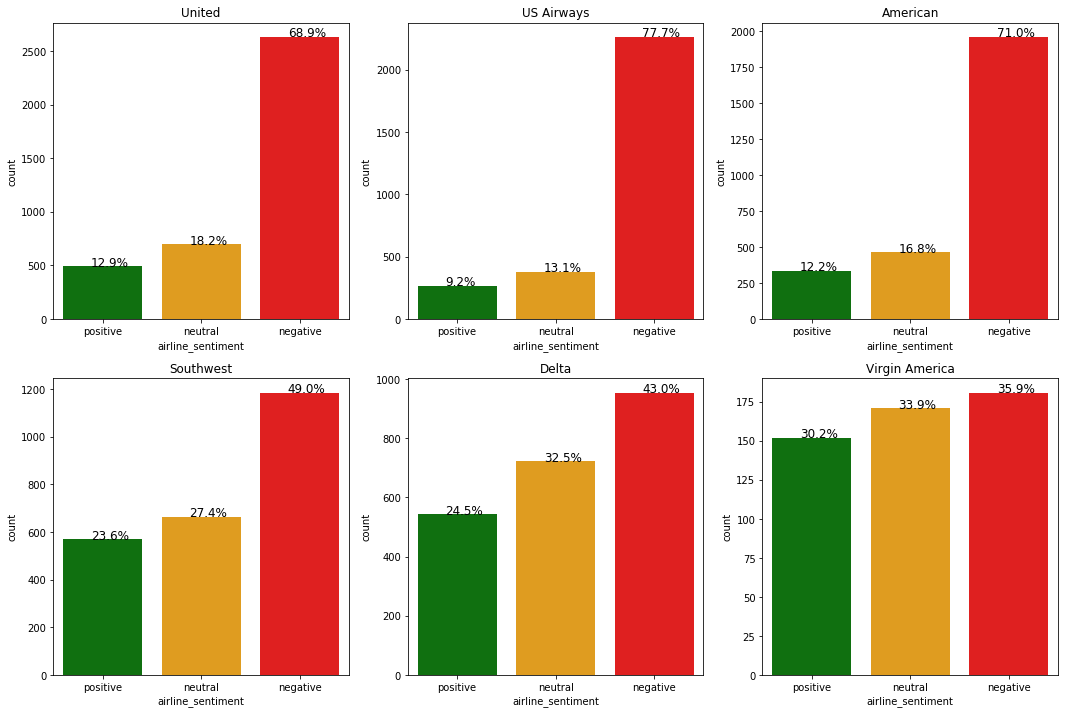

In [14]:
# Plotting sentiments for each airlines
plt.figure(figsize=(18,12))
for i, airline in enumerate(airlines):
    plt.subplot(2,3,i+1)
    plt.title(airline)
    ax=sns.countplot(x='airline_sentiment', 
                     data = tweet_data[tweet_data['airline'] == airline], 
                     palette={'positive': 'green', 'negative': 'red', 'neutral': 'orange'},
                     order=['positive', 'neutral','negative'])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/len(tweet_data[tweet_data['airline'] == airline])) # percentage of each class of the category
        x = p.get_x() + 0.35 * p.get_width() # width of the plot
        y = p.get_height()         # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage
plt.show();

### Word clouds before pre-processing

#### Tweets with positive sentiments

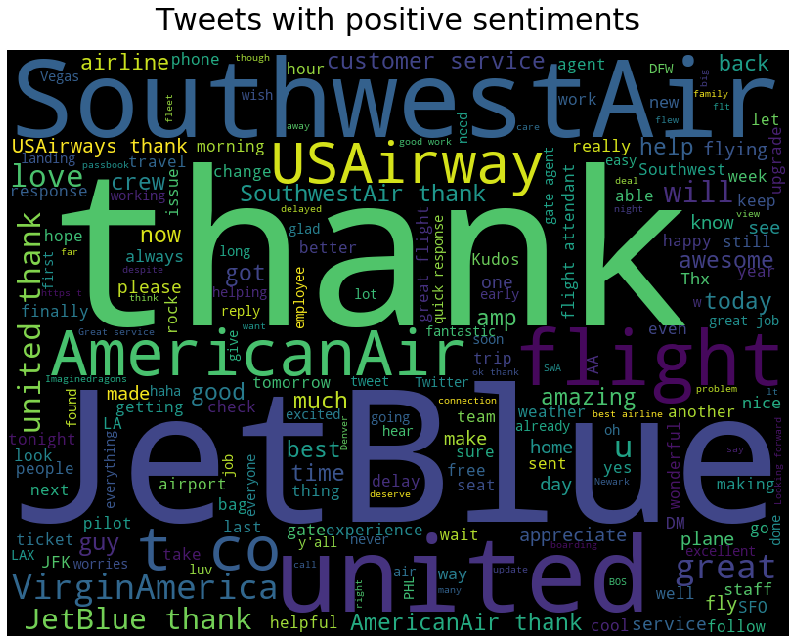

In [15]:
# Word cloud for tweets with positive sentiments
text = ''.join(tweet_data[tweet_data['airline_sentiment']=='positive']['text'].astype(str).tolist())
stopwords = set(wordcloud.STOPWORDS)
fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='black',
                                    colormap='viridis', width=800, height=600).generate(text)
plt.figure(figsize=(14,11), frameon=True)
plt.imshow(fig_wordcloud)  
plt.axis('off')
plt.title('Tweets with positive sentiments', fontsize=30, pad=20)
plt.show()

#### Tweets with negative sentiments

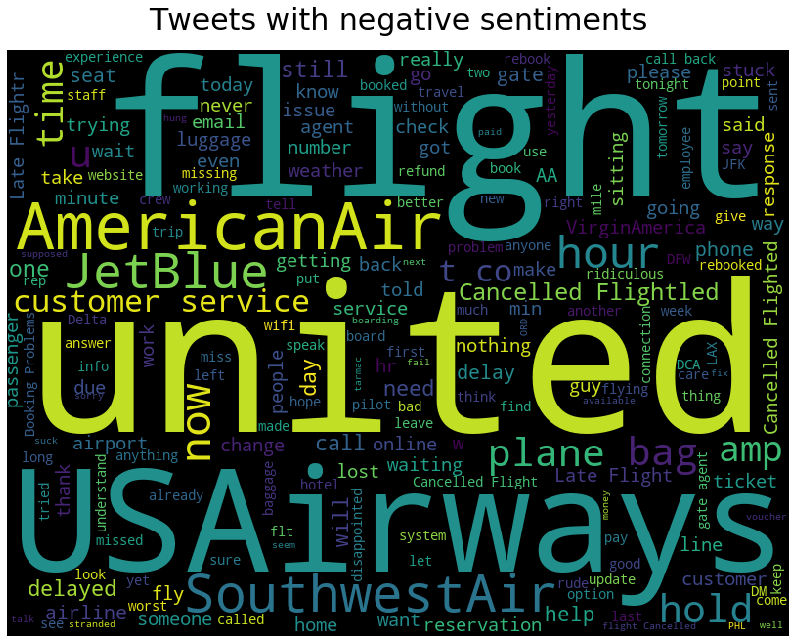

In [16]:
# Word cloud for tweets with negative sentiments
text = ''.join(tweet_data[tweet_data['airline_sentiment']=='negative']['text'].astype(str).tolist())
stopwords = set(wordcloud.STOPWORDS)
fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='black',
                                    colormap='viridis', width=800, height=600).generate(text)
plt.figure(figsize=(14,11), frameon=True)
plt.imshow(fig_wordcloud)  
plt.axis('off')
plt.title('Tweets with negative sentiments', fontsize=30, pad=20)
plt.show()

In [17]:
#Keeping the 'text' and 'airline_sentiment' columns.

tweets = tweet_data.loc[:, ['airline_sentiment', 'text']]

In [18]:
#Checking the shape of dataset after dropping irrelevant columns

tweets.shape

(14640, 2)

In [19]:
#Displaying full dataframe information (Non-turncated Text column.)

pd.set_option('display.max_colwidth', 0) 
tweets.head() 

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


#### Data Pre-processing:

- Html tags removal.
- Replace contractions in string
- Remove the numbers.
- Removal of Special Characters and Punctuations
- Tokenization
- Conversion to lowercase
- Lemmatize or stemming
- Join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format
- Print first 5 rows of data after pre-processing

In [20]:
#Hmtl tags removal

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

tweets['text'] = tweets['text'].apply(lambda x: strip_html(x))
tweets.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [21]:
#Replacing contractions in string

def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

tweets['text'] = tweets['text'].apply(lambda x: replace_contractions(x))
tweets.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it


In [22]:
#Removing the numbers

def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

tweets['text'] = tweets['text'].apply(lambda x: remove_numbers(x))
tweets.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it


In [23]:
#Tokenize the dataset

tweets['text'] = tweets.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) 

tweets.head() 

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]"
2,neutral,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,negative,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]"
4,negative,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"


In [24]:
#Remove stop words from list of tokenized words

def remove_stopwords(words):
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words
tweets['text'] = tweets['text'].apply(lambda x: remove_stopwords(x))

In [25]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

tweets['text'] = tweets.apply(lambda row: normalize(row['text']), axis=1)

# Print first 5 rows of data after pre-processing
tweets.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience tacky
2,neutral,virginamerica today must mean need take another trip
3,negative,virginamerica really aggressive blast obnoxious entertainment guests face little recourse
4,negative,virginamerica really big bad thing


#### Word clouds after pre-processing

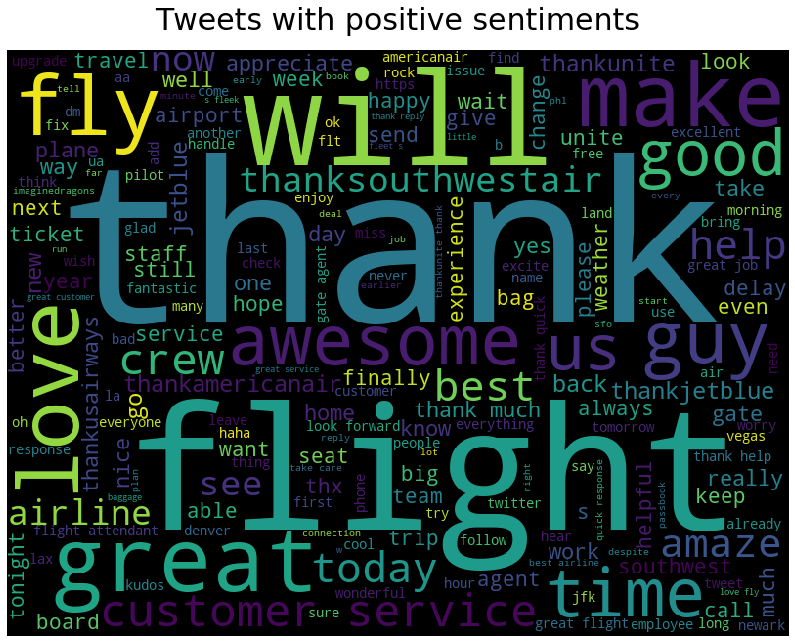

In [26]:
#Word cloud for tweets with positive sentiments

text = ''.join(tweets[tweets['airline_sentiment']=='positive']['text'].astype(str).tolist())
stopwords = set(wordcloud.STOPWORDS)
fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='black',
                                    colormap='viridis', width=800, height=600).generate(text)
plt.figure(figsize=(14,11), frameon=True)
plt.imshow(fig_wordcloud)  
plt.axis('off')
plt.title('Tweets with positive sentiments', fontsize=30, pad=20)
plt.show()

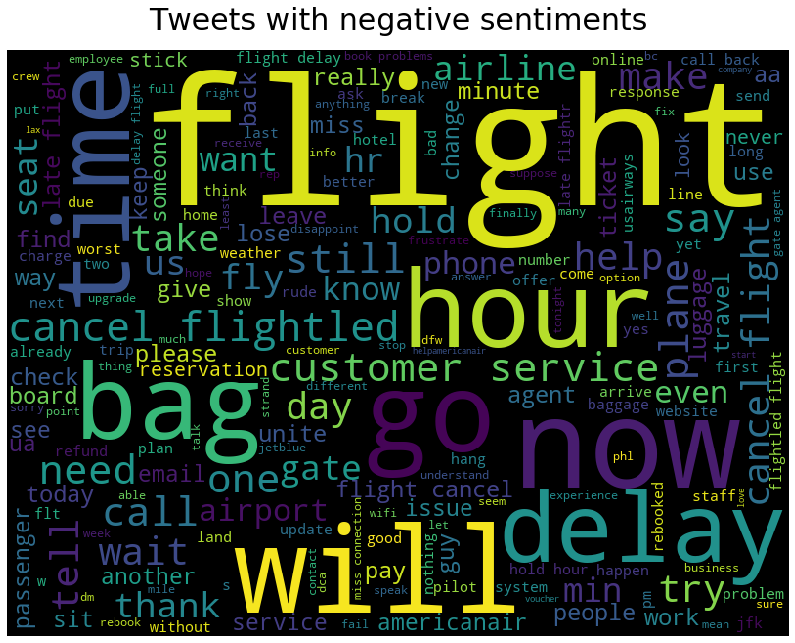

In [27]:
# Word cloud for tweets with negative sentiments

text = ''.join(tweets[tweets['airline_sentiment']=='negative']['text'].astype(str).tolist())
stopwords = set(wordcloud.STOPWORDS)
fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='black',
                                    colormap='viridis', width=800, height=600).generate(text)
plt.figure(figsize=(14,11), frameon=True)
plt.imshow(fig_wordcloud)  
plt.axis('off')
plt.title('Tweets with negative sentiments', fontsize=30, pad=20)
plt.show()

#### Vectorization

In [28]:
label = tweets.loc[:, ['airline_sentiment']]
label.shape

(14640, 1)

In [29]:
# Use Count Vectorizer to convert text data to numbers and extract features.

from sklearn.feature_extraction.text import CountVectorizer

# Keep only 1000 features to manage processing time.

vectorizer_cv = CountVectorizer(max_features=1000)
tweets_features_cv = vectorizer_cv.fit_transform(tweets['text'])

 # Convert the features into array.

tweets_features_cv = tweets_features_cv.toarray()  
tweets_features_cv.shape

(14640, 1000)

In [30]:
# Use TfidfVectorizer to convert text data to numbers and extract features.

from sklearn.feature_extraction.text import TfidfVectorizer

# Keep only 1000 features to manage processing time.
vectorizer_tf = TfidfVectorizer(max_features=1000)
tweets_features_tf = vectorizer_tf.fit_transform(tweets['text'])

 # Convert the features into array.
tweets_features_tf = tweets_features_tf.toarray()

tweets_features_tf.shape

(14640, 1000)

#### Modelling and Evaluation

###### Fit and Evaluate model using Count Vectorizer

In [31]:
#Split data into ratio 70:30 training and testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tweets_features_cv, label, test_size=0.3, random_state=42)

In [32]:
#Build a random forest model to classify the sentiments
rf_cv = RandomForestClassifier(n_estimators=10 ,n_jobs=4)

In [33]:
#Fit the model on the training dataset
rf_cv = rf_cv.fit(X_train, y_train)

print(rf_cv)

RandomForestClassifier(n_estimators=10, n_jobs=4)


In [34]:
#Calculate the cross validation score
print(np.mean(cross_val_score(rf_cv, tweets_features_cv, label, cv=10)))

0.6995901639344264


In [35]:
#Predict the results from the trained model on the test data

y_pred_cv = rf_cv.predict(X_test)

[[2431  277  106]
 [ 365  432   87]
 [ 176  117  401]]


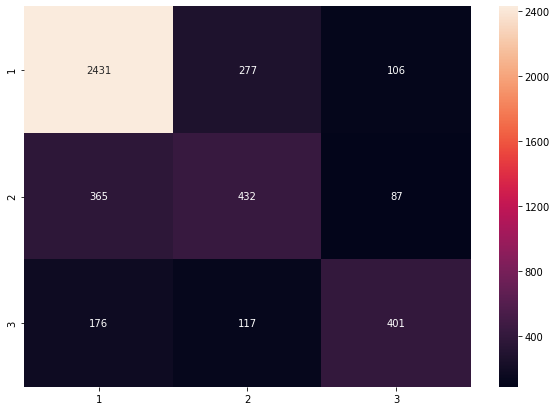

In [36]:
# Plot Confusion matrix for the actual and predicted classes for model built using Count Vectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred_cv)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

##### Fit and Evaluate model using Tf-Idf Vectorizer

In [37]:
# Split data with the ratio 70:30 into training and testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tweets_features_tf,label, test_size=0.3, random_state=42)

In [38]:
#Build a random forest model to classify the sentiments
rf_tf = RandomForestClassifier(n_estimators=10, n_jobs=4)

rf_tf = rf_tf.fit(X_train, y_train)

print(rf_tf)

print(np.mean(cross_val_score(rf_tf, tweets_features_tf, label, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.6963114754098361


In [39]:
#Predict the results from the trained model on the test data
y_pred_tf = rf_tf.predict(X_test)

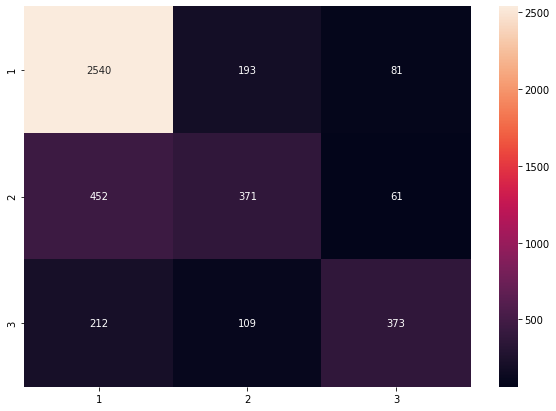

In [40]:
#Plot Confusion matrix for the actual and predicted classes for model built using Td-Ifd Vectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred_tf)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

#### Getting the Top 40 Features

In [41]:
all_features = vectorizer_cv.get_feature_names()   #Initiating the feature from the vectorizer
top_features=''                         # Addition of top 40 feature into top_feature after training the model
feat=rf_tf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
print(top_features)

thank jetblue southwestair unite americanair great usairways flight virginamerica love delay will bag amaze hold cancel please follow fly hour call awesome wait now customer appreciate need best hours service time get help good dm make plane hi flightled us 


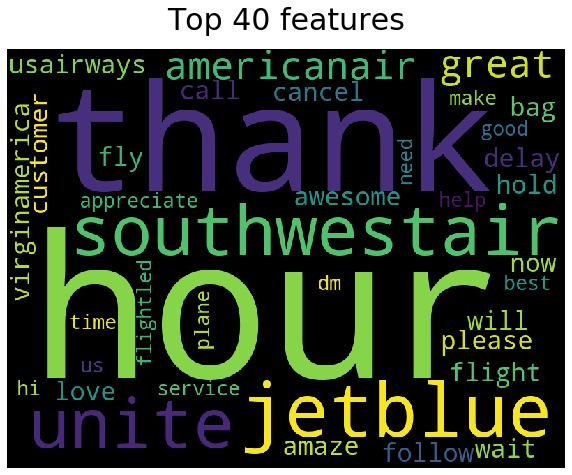

In [42]:
# Word cloud for top 40 features
stopwords = set(wordcloud.STOPWORDS)
fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='black',
                                    colormap='viridis', width=800, height=600).generate(top_features)
plt.figure(figsize=(10,10), frameon=True)
plt.imshow(fig_wordcloud)  
plt.axis('off')
plt.title('Top 40 features', fontsize=30, pad=20)
plt.show()

#### Conclusion

- I used different pre-processing tool to classify the sentiments in tweets into positive, negative and neutral
- The pre-processing tools also helped remove html tags, numbers, special characters and replace contractions amongst other data cleansing
- There is a higher cross validation score using Tf-Idf vectorizer compared to the use of Count vectorizer
- There is room for improvement of the model's accuracy by increasing the dataset used in the model building.